In [1]:
3==3

True

In [2]:
import os
import tqdm
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import cv2
from PIL import Image

import webcolors
import matplotlib.pyplot as plt

In [3]:
print(webcolors.name_to_rgb('orange'))
print(webcolors.rgb_to_name((0, 0, 0)))

IntegerRGB(red=255, green=165, blue=0)
black


In [4]:
classes = os.listdir('/mnt/nas4/hm/datasets/shopping_clothes/data/data900_personby100')
classes = [i for i in classes if i.isascii()]
classes.remove('.ipynb_checkpoints')
classes_color = ['red','orange','yellow','green','blue']
classes_color = {classes[i]:classes_color[i] for i in range(len(classes_color))}

print(len(classes))
print(classes)
print(classes_color)

5
['top', 'skirt', 'outer', 'dress', 'bottom']
{'top': 'red', 'skirt': 'orange', 'outer': 'yellow', 'dress': 'green', 'bottom': 'blue'}


In [5]:
### MAKE COLOR-MAP

# def make_colormap(num=256):
#     def bit_get(val, idx):
#         return (val >> idx) & 1
 
#     colormap = np.zeros((num, 3), dtype=int)
#     ind = np.arange(num, dtype=int)
 
#     for shift in reversed(list(range(8))):
#         for channel in range(3):
#             colormap[:, channel] |= bit_get(ind, channel) << shift
#         ind >>= 3
        
#     return colormap

bg_pixel = [200,200,200]
cmap = [bg_pixel]
for i in classes :
    col = classes_color[i]
    r,g,b = webcolors.name_to_rgb(col)
    cmap.append([r,g,b])
    
palette = [value for color in cmap for value in color]
cmap

[[200, 200, 200],
 [255, 0, 0],
 [255, 165, 0],
 [255, 255, 0],
 [0, 128, 0],
 [0, 0, 255]]

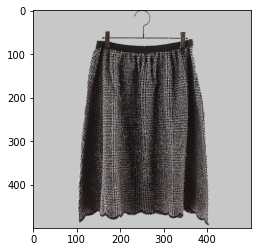

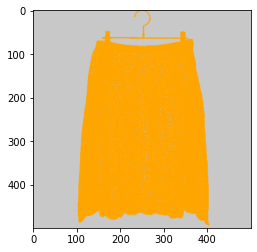

In [6]:
data_path = '/mnt/nas4/hm/datasets/shopping_clothes/data/data900_personby100'
files = sorted(os.listdir(os.path.join(data_path,classes[1],'remove_bg')))
label_img = cv2.imread(os.path.join(data_path,classes[1],'remove_bg',files[0]))
label_img = np.array(label_img)
label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB)
label_img[np.any(label_img == [0, 0, 0], axis=-1)] = bg_pixel
plt.imshow(label_img)
plt.show()

color_pixel = webcolors.name_to_rgb(classes_color[classes[1]])
r,g,b = color_pixel.red, color_pixel.green, color_pixel.blue
label_img[np.any(label_img != [200,200,200], axis=-1)] = [r,g,b]
plt.imshow(label_img)
plt.show()

img_png = np.zeros((label_img.shape[0], label_img.shape[1]), np.uint8)
for index, val_col in enumerate(cmap):
    img_png[np.where(np.all(label_img == val_col, axis=-1))] = index

img_png = Image.fromarray(img_png).convert('P')
img_png.putpalette(palette)

In [7]:
# img_png.save('t.png')

In [8]:
%time

data_path = '/mnt/nas4/hm/datasets/shopping_clothes/data/data900_personby100'

for c in classes : 
    print('-----------------',c,'-----------------')
    files = sorted(os.listdir(os.path.join(data_path,c,'remove_bg')))
#     for f in tqdm.notebook.tqdm(files) : 
    for f in tqdm.tqdm_notebook(files) :
        label_img = cv2.imread(os.path.join(data_path,c,'remove_bg',f))
        label_img = np.array(label_img)
        label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB)
        label_img[np.any(label_img == [0, 0, 0], axis=-1)] = bg_pixel

        color_pixel = webcolors.name_to_rgb(classes_color[c])
        r,g,b = color_pixel.red, color_pixel.green, color_pixel.blue
        label_img[np.any(label_img != [200,200,200], axis=-1)] = [r,g,b]

        img_png = np.zeros((label_img.shape[0], label_img.shape[1]), np.uint8)
        for index, val_col in enumerate(cmap):
            img_png[np.where(np.all(label_img == val_col, axis=-1))] = index

        img_png = Image.fromarray(img_png).convert('P')
        img_png.putpalette(palette)
        
        save_name = os.path.join(data_path,c,'label',f.replace('removebg','label'))
        img_png.save(save_name)

        
#         break
#     break

CPU times: user 0 ns, sys: 1 µs, total: 1 µs
Wall time: 3.58 µs
----------------- top -----------------


  0%|          | 0/180 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


----------------- skirt -----------------


  0%|          | 0/180 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


----------------- outer -----------------


libpng warning: iCCP: known incorrect sRGB profile


  0%|          | 0/180 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

----------------- dress -----------------


  0%|          | 0/180 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


----------------- bottom -----------------


  0%|          | 0/180 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [9]:
for c in classes :
    print('  ',c)
    files = sorted(os.listdir(os.path.join(data_path,c,'remove_bg')))
    labels = sorted(os.listdir(os.path.join(data_path,c,'label')))
    print(len(files),len(labels))


   top
180 180
   skirt
180 180
   outer
180 180
   dress
180 180
   bottom
180 180


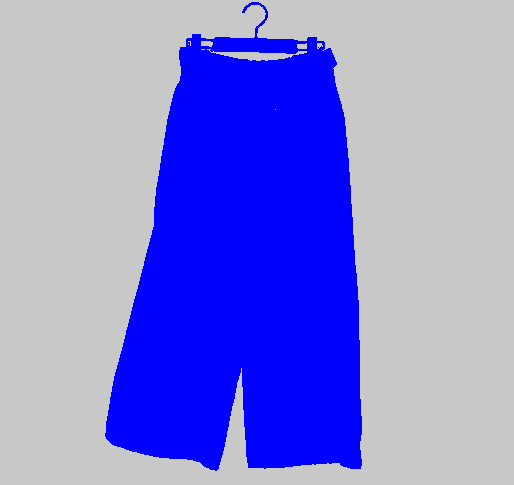

Counter({0: 162725, 5: 86565})


In [10]:
t = Image.open(save_name)
display(t)
t = np.asarray(t, dtype=np.int32)
print(Counter(t.flatten()))

In [27]:
# import shutil

# for c in classes : 
#     dir_path = os.path.join(data_path,c,'label')
#     if os.path.exists(dir_path):
#         shutil.rmtree(dir_path)

In [29]:
# for c in classes : 
#     dir_path = os.path.join(data_path,c,'label')
#     os.makedirs(dir_path)